## **LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from google.colab import files
import csv
import time
import math
import random
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

# Upload Data

In [ ]:
uploaded = files.upload()

Saving realclass.csv to realclass.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


## **DATA EXPLORATION AND PREPROCESSING**

In [ ]:
dftrain = pd.read_csv("train.csv")

In [ ]:
dftest = pd.read_csv("test.csv")

In [ ]:
dftrain = dftrain["trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition|fraud"].str.split("|")
dftrain = dftrain.to_list()
names = ["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration",
         "quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition","fraud"]
dftrain = pd.DataFrame(dftrain, columns=names)

In [ ]:
dftest

,trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition
0,4|467|88.48|4|8|4|0.0149892933618844|0.1894646...
1,3|1004|58.99|7|6|1|0.0268924302788845|0.058754...
2,1|162|14|4|5|4|0.00617283950617284|0.086419753...
3,5|532|84.79|9|3|4|0.0263157894736842|0.1593796...
4,5|890|42.16|4|0|0|0.0213483146067416|0.0473707...
...,...
498116,4|783|59.1|2|2|0|0.0127713920817369|0.07547892...
498117,1|278|98.9|9|5|4|0.0503597122302158|0.35575539...
498118,3|300|5.41|6|6|4|0.03|0.0180333333333333|0.666...
498119,2|1524|33.97|2|5|3|0.00590551181102362|0.02229...


In [ ]:
dftrain

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.7,7,0,3,0.0275142314990512,0.0518975332068311,0.241379310344828,0
1,3,108,27.36,5,2,4,0.12962962962963,0.253333333333333,0.357142857142857,0
2,3,1516,62.16,3,10,5,0.00857519788918206,0.0410026385224274,0.230769230769231,0
3,6,1791,92.31,8,4,4,0.0161920714684534,0.0515410385259632,0.275862068965517,0
4,5,430,81.53,3,7,2,0.0627906976744186,0.189604651162791,0.111111111111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.0716510903426791,0.236853582554517,0.347826086956522,0
1875,1,397,41.89,5,5,0,0.0654911838790932,0.10551637279597,0.192307692307692,1
1876,4,316,41.83,5,8,1,0.0949367088607595,0.132373417721519,0.166666666666667,0
1877,2,685,62.68,1,6,2,0.035036496350365,0.0915036496350365,0.0416666666666667,0


In [ ]:
dftest = dftest["trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition"].str.split("|")
dftest = dftest.to_list()
names1 = ["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration",
         "quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition"]
dftest = pd.DataFrame(dftest, columns=names1)

In [ ]:
dftest

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.0149892933618844,0.189464668094218,0.571428571428571
1,3,1004,58.99,7,6,1,0.0268924302788845,0.0587549800796813,0.259259259259259
2,1,162,14,4,5,4,0.00617283950617284,0.0864197530864197,4
3,5,532,84.79,9,3,4,0.0263157894736842,0.15937969924812,0.642857142857143
4,5,890,42.16,4,0,0,0.0213483146067416,0.0473707865168539,0.210526315789474
...,...,...,...,...,...,...,...,...,...
498116,4,783,59.1,2,2,0,0.0127713920817369,0.0754789272030651,0.2
498117,1,278,98.9,9,5,4,0.0503597122302158,0.355755395683453,0.642857142857143
498118,3,300,5.41,6,6,4,0.03,0.0180333333333333,0.666666666666667
498119,2,1524,33.97,2,5,3,0.00590551181102362,0.0222900262467192,0.222222222222222


# Data Type and Missing Value

In [ ]:
dftrain.isnull().sum()*100/len(dftrain)

trustLevel                   0.0
totalScanTimeInSeconds       0.0
grandTotal                   0.0
lineItemVoids                0.0
scansWithoutRegistration     0.0
quantityModifications        0.0
scannedLineItemsPerSecond    0.0
valuePerSecond               0.0
lineItemVoidsPerPosition     0.0
fraud                        0.0
dtype: float64

In [ ]:
dftest.isnull().sum()*100/len(dftest)

trustLevel                   0.0
totalScanTimeInSeconds       0.0
grandTotal                   0.0
lineItemVoids                0.0
scansWithoutRegistration     0.0
quantityModifications        0.0
scannedLineItemsPerSecond    0.0
valuePerSecond               0.0
lineItemVoidsPerPosition     0.0
dtype: float64

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   trustLevel                 1879 non-null   object
 1   totalScanTimeInSeconds     1879 non-null   object
 2   grandTotal                 1879 non-null   object
 3   lineItemVoids              1879 non-null   object
 4   scansWithoutRegistration   1879 non-null   object
 5   quantityModifications      1879 non-null   object
 6   scannedLineItemsPerSecond  1879 non-null   object
 7   valuePerSecond             1879 non-null   object
 8   lineItemVoidsPerPosition   1879 non-null   object
 9   fraud                      1879 non-null   object
dtypes: object(10)
memory usage: 146.9+ KB


In [ ]:
dftrain = dftrain.astype(np.float64)

In [ ]:
dftrain.dtypes

trustLevel                   float64
totalScanTimeInSeconds       float64
grandTotal                   float64
lineItemVoids                float64
scansWithoutRegistration     float64
quantityModifications        float64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                        float64
dtype: object

# Correlation

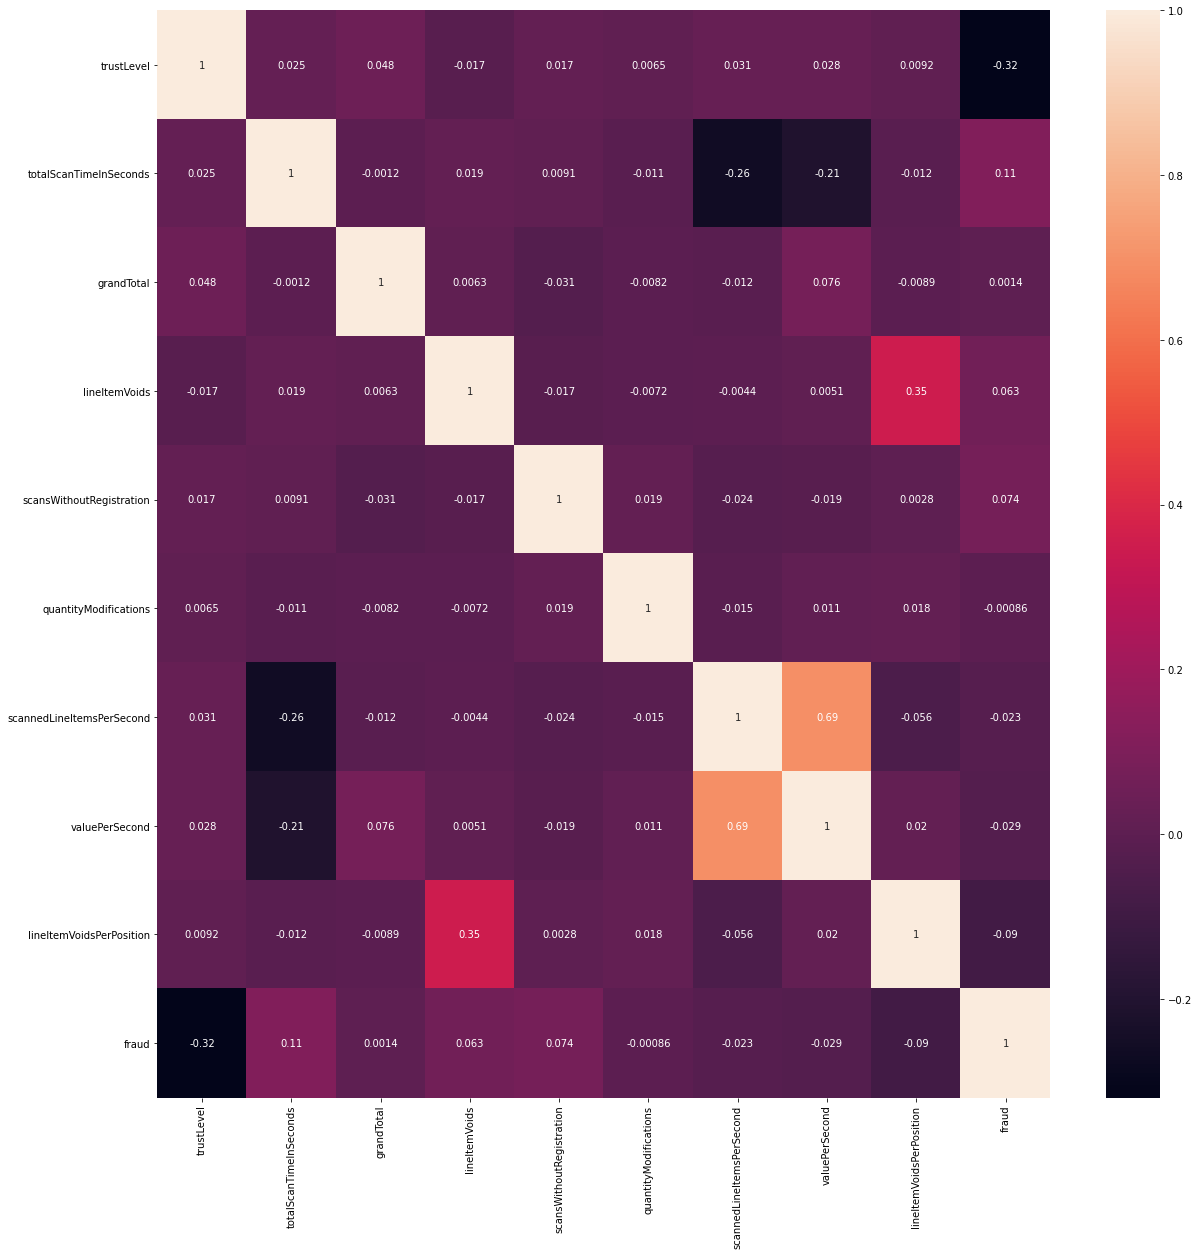

In [ ]:
corr = dftrain.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, xticklabels=1, annot = True)

In [ ]:
pearsoncorr = dftrain.corr(method='pearson')
pearsoncorr

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000


# **Distribution & Outliers**

In [ ]:
import plotly.express as px
fig = px.bar(dftrain.groupby('fraud').size().reset_index(name='count'), 
             x='fraud', y='count', width=480, height=480, 
             barmode='group', title='Label distribution')
fig.show(renderer='colab')

In [ ]:
def plot_distribution(df):
  fraud_yes = df[df.fraud == 1]
  fraud_no = df[df.fraud == 0]
  for i, col in enumerate(df.columns):
    x1 = fraud_yes[col]
    x2 = fraud_no[col]
    fig = make_subplots(1, 2, subplot_titles=['Histogram', 'Box'])
    fig.add_trace(go.Histogram(x=x2, name='Fraud = No'), row=1, col=1)
    fig.add_trace(go.Histogram(x=x1, name='Fraud = Yes'), row=1, col=1)
    fig.add_trace(go.Box(x=x2, name='Fraud = No', showlegend=False), row=1, col=2)
    fig.add_trace(go.Box(x=x1, name='Fraud = Yes', showlegend=False), row=1, col=2)
    fig.update_layout(title_text=col, width=960, height=480)
    fig.show(renderer='colab')

In [ ]:
plot_distribution(dftrain)

In [ ]:
def filterOutliers(df):
  for col in df.columns:
    df[col] = np.where(df[col] > df[col].quantile(0.99), df[col].quantile(0.50), df[col])
    df[col] = np.where(df[col] < df[col].quantile(0.01), df[col].quantile(0.50), df[col])

In [ ]:
check_distribution = dftrain.skew(axis=0,skipna = True)
check_distribution

trustLevel                    0.087738
totalScanTimeInSeconds       -0.033743
grandTotal                   -0.027450
lineItemVoids                 0.011823
scansWithoutRegistration      0.056318
quantityModifications        -0.031998
scannedLineItemsPerSecond    15.078211
valuePerSecond               20.771462
lineItemVoidsPerPosition      4.315624
fraud                         3.892311
dtype: float64

In [ ]:
dftrain["scannedLineItemsPerSecond"] = dftrain["scannedLineItemsPerSecond"].map(lambda i: np.log(i) if i > 0 else 0) 
dftrain["valuePerSecond"] = dftrain["valuePerSecond"].map(lambda i: np.log(i) if i > 0 else 0) 
dftrain["lineItemVoidsPerPosition"] = dftrain["lineItemVoidsPerPosition"].map(lambda i: np.log(i) if i > 0 else 0) 

In [ ]:
print(dftrain.skew(axis=0,skipna = True))

trustLevel                   0.087738
totalScanTimeInSeconds      -0.033743
grandTotal                  -0.027450
lineItemVoids                0.011823
scansWithoutRegistration     0.056318
quantityModifications       -0.031998
scannedLineItemsPerSecond    0.479730
valuePerSecond              -0.116673
lineItemVoidsPerPosition     0.146105
fraud                        3.892311
dtype: float64


In [ ]:
plot_distribution(dftrain)

## **Feature Engineering**

In [ ]:
X_train,Y_train = dftrain.iloc[:,:-1].values,dftrain.iloc[:,9].values

## **FEATURE SCALING**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
Xtrain_scaled = min_max_scaler.transform(X_train)
Xtest_scaled = min_max_scaler.transform(dftest)

In [ ]:
Y_label = pd.read_csv("realclass.csv")

In [ ]:
Y_test = Y_label.select_dtypes('int').astype('float64')


In [ ]:
X_train,X_test = Xtrain_scaled, Xtest_scaled

## **DECISION TREE CLASSIFICATION**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [ ]:
 print(confusion_matrix(Y_test, Y_pred))  

[[434950  39444]
 [  9813  13914]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    474394
         1.0       0.26      0.59      0.36     23727

    accuracy                           0.90    498121
   macro avg       0.62      0.75      0.65    498121
weighted avg       0.94      0.90      0.92    498121



In [ ]:
X = dftrain.iloc[:,0:9]
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree_stroke.dot", class_names=["1","0"],
                feature_names=X.columns, impurity=False, filled=True)

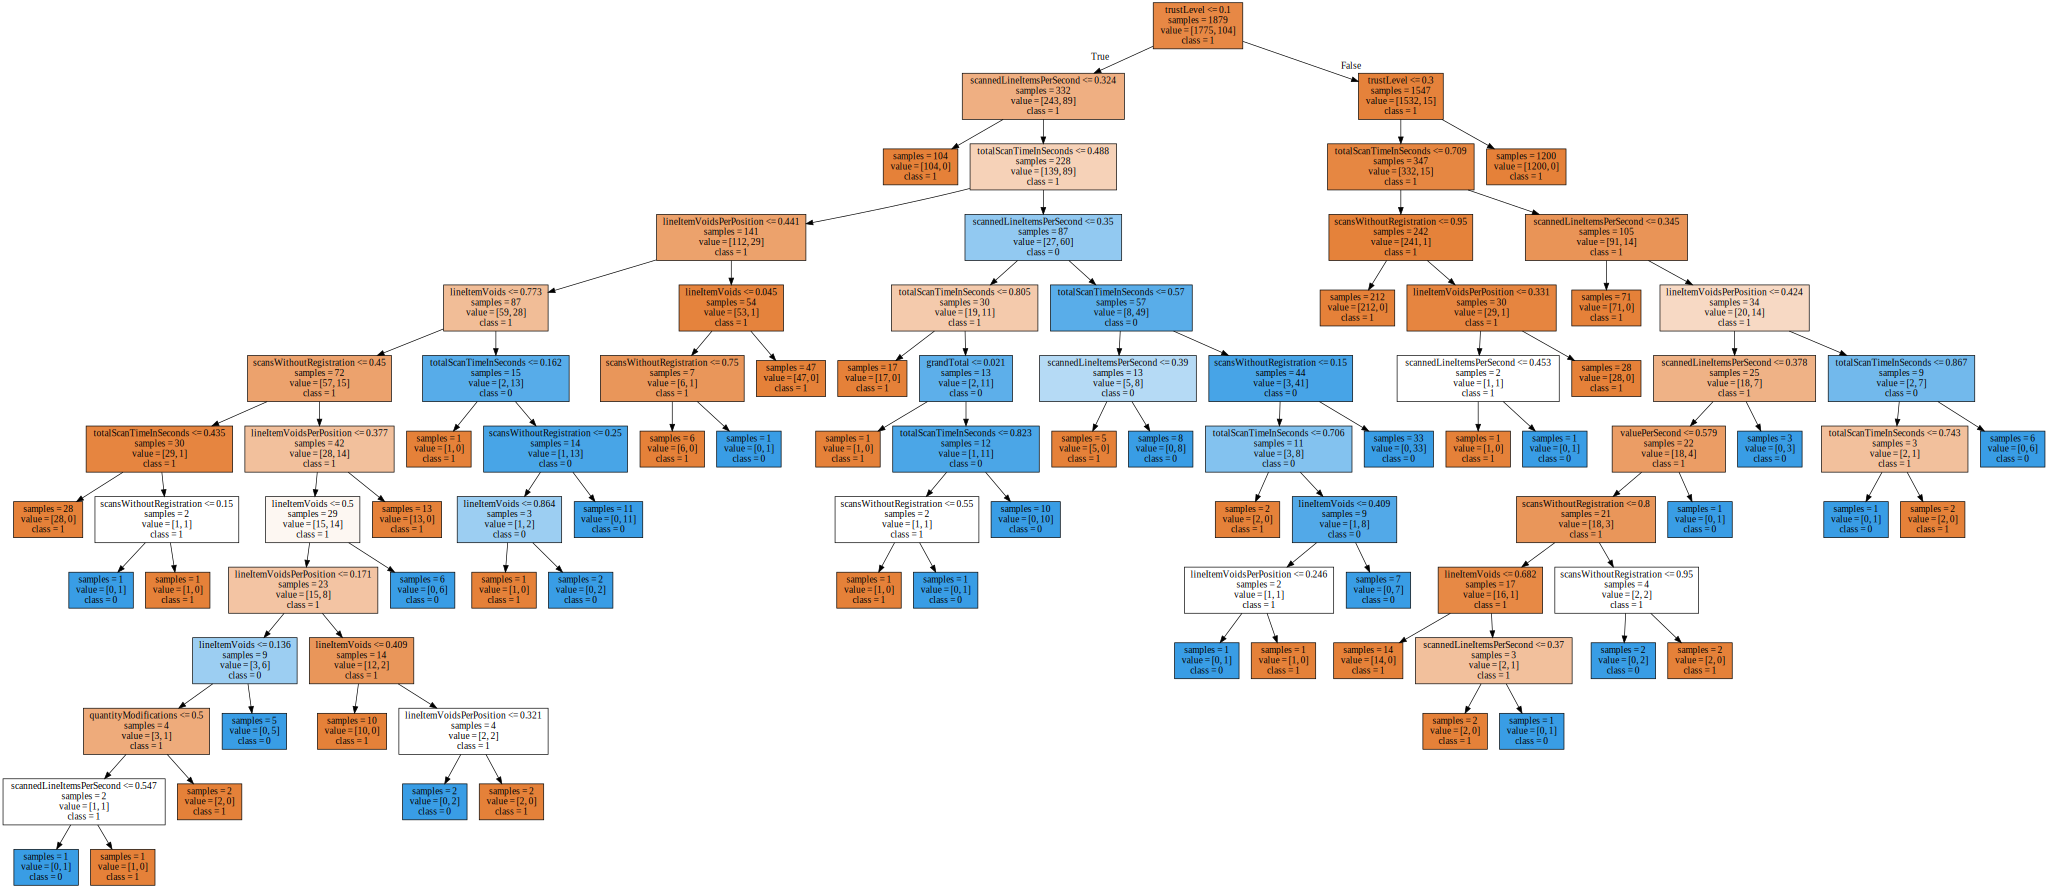

In [ ]:
import graphviz

with open("tree_stroke.dot") as fig:
  dot_graph =fig.read()
graphviz.Source(dot_graph)

## **KNN CLASSIFICATION**

In [ ]:
def findBestK(X_train,Y_train,X_test,Y_test,k):
  error = []
  for i in tqdm(range(1, k)): 
    time.sleep(0.1)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))
  plt.figure(figsize=(12, 6)) 
  plt.plot(range(1, len(error)+1), error, color='blue', linestyle='dashed', marker='o',markerfacecolor='green', markersize=8)
  plt.title("Best K") 
  plt.xlabel('K') 
  plt.ylabel('Error Average')
  return error.index(min(error))+1

In [ ]:
Y_test = Y_test.iloc[:,0].values

100%|██████████| 30/30 [14:45<00:00, 29.50s/it]


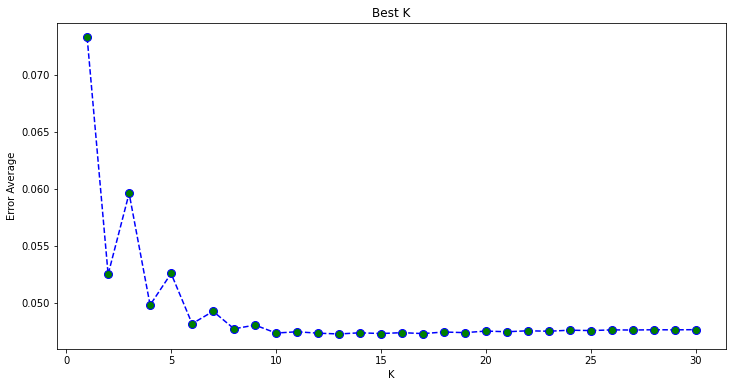

In [ ]:
random_rangeK = random.randint(25,50)
best_K = findBestK(X_train,Y_train,X_test,Y_test,random_rangeK)  

In [ ]:
print("The best K from the smallest error average is: ",best_K)
print("--------------Result Bersalju Besok-------------")
classifier = KNeighborsClassifier(n_neighbors=best_K) 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
 
print(confusion_matrix(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred))

The best K from the smallest error average is:  13
--------------Result Bersalju Besok-------------
[[473644    750]
 [ 22788    939]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    474394
         1.0       0.56      0.04      0.07     23727

    accuracy                           0.95    498121
   macro avg       0.76      0.52      0.52    498121
weighted avg       0.94      0.95      0.93    498121



## **CLUSTERING**

In [ ]:
# This function is for preprocessing data from raw to new dataframe that ready to analyze further.
def preprocess(df):
    df.corr(method ='pearson')
    correlation_feature = correlations(df,0.50)
    return df

# This function is to collect the columns that has the percantage above 79 of corralation and drop the the others attributes
# that only get the percentage above 80%
def correlations(df,threshold):
    col_correlation = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold: 
                colname = corr_matrix.columns[i]
                col_correlation.add(colname)
        if corr_matrix.columns[i] not in col_correlation:
            df.__delitem__(corr_matrix.columns[i])
    return col_correlation

# This function is to calculate the distance of samples and centrois.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# This function is measure the quality of cluster by calculate the sum square error
def _sse(df,clusters,centroids):
    _total = 0
    for center, idx_samples in zip(centroids, clusters):
        _sum = 0
        for idx, samples in enumerate(idx_samples):
            _sum += np.sum((df[samples]-center)**2)
        _total += _sum
    return _total

# This function is for gathering the samples that close to the centroids in order to create the clustes
def create_clusters(df,k,centroids):
    clusters = [[] for _ in range(k)]
    for idx, row in enumerate(df):
        distances = [euclidean_distance(row, dot) for dot in centroids]
        closest_index = np.argmin(distances)
        clusters[closest_index].append(idx)
    return clusters

#This function is uodating the centroid by using the mean value of clusters.
def update_centroids(df,k,clusters):
    centroids = np.zeros((k,df.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(df[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids

# This function is to check the consistent of the centroids by using euclidean distance.
#if the distance between old_centroids and new centroids is equal to zero, then the final centroid is permanent.
def is_consistent(k,previous_centroid,centroids):
    distances = [euclidean_distance(previous_centroid[i], centroids[i]) for i in range(k)]
    return sum(distances) == 0

# This function is to plot the final clusters that have already evaluate in elbow method  
def plot(df,clusters,centroids):
    final_cluster = np.empty(len(df))
    for idx_cluster, cluster in enumerate(clusters):
        for idx_sample in cluster:
            final_cluster[idx_sample] = idx_cluster
    plt.scatter(df[:,0],df[:,1],c=final_cluster,cmap='brg')
    plt.scatter(centroids[:,0],centroids[:,1], marker="x", color='black',linewidth=2)
    print("The center of the clusters are: ",centroids)
    return final_cluster

    # df = pd.DataFrame(df, columns=["scannedLineItemsPerSecond","valuePerSecond"])
    # final_cluster = pd.DataFrame(final_cluster, columns=["Clusters"])
    # df = pd.concat([df,final_cluster],axis=1,join="inner")


In [ ]:
# This function is to call all of the procedures and function to build a model and evaluation.
# This function will return plot clusters when the cluster is finishing the evaluatation else 
# return the process of evalution (SSE function)
def clustering(df,k,plot_clusters):
    random_centroid_idx = np.random.choice(len(df),k,replace=False)
    centroids = [df[idx] for idx in random_centroid_idx]

    for _ in range(100):

        clusters = create_clusters(df,k,centroids)
          
        previous_centroids = centroids
        centroids = update_centroids(df,k,clusters)
        
        if is_consistent(k,previous_centroids, centroids):
            break
    if plot_clusters:
        return plot(df,clusters,centroids)
    else:
        return _sse(df,clusters,centroids)

In [ ]:
Xtrain_scaled
dftrain = pd.DataFrame(Xtrain_scaled, columns = ["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration",
         "quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition"])

In [ ]:
dftrain

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.8,0.575178,0.547174,0.636364,0.0,0.6,0.416340,0.575610,0.341400
1,0.4,0.057955,0.273637,0.454545,0.2,0.8,0.581118,0.677669,0.408957
2,0.4,0.827775,0.621811,0.272727,1.0,1.0,0.292401,0.560441,0.333649
3,1.0,0.978130,0.923462,0.727273,0.4,0.8,0.359976,0.575166,0.364427
4,0.8,0.234008,0.815608,0.272727,0.7,0.4,0.504057,0.659016,0.207614
...,...,...,...,...,...,...,...,...,...
1874,0.0,0.174412,0.760580,0.727273,0.7,0.4,0.518090,0.673339,0.404399
1875,0.0,0.215965,0.419010,0.454545,0.5,0.0,0.508533,0.621289,0.302209
1876,0.6,0.171679,0.418409,0.454545,0.8,0.2,0.548006,0.635886,0.277533
1877,0.2,0.373428,0.627014,0.090909,0.6,0.4,0.442034,0.612116,0.038479


      scannedLineItemsPerSecond  valuePerSecond
0                      0.416340        0.575610
1                      0.581118        0.677669
2                      0.292401        0.560441
3                      0.359976        0.575166
4                      0.504057        0.659016
...                         ...             ...
1874                   0.518090        0.673339
1875                   0.508533        0.621289
1876                   0.548006        0.635886
1877                   0.442034        0.612116
1878                   0.363048        0.547162

[1879 rows x 2 columns]


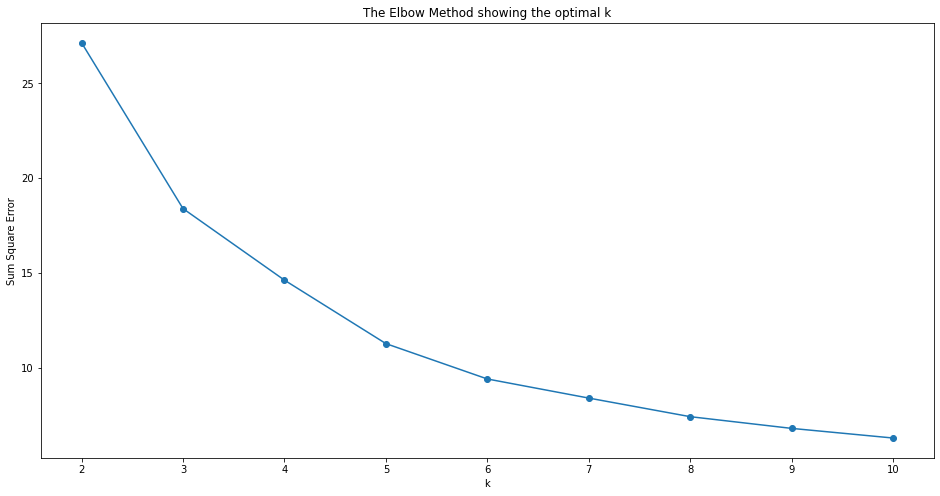

The optimal k of Elbow Method is:  3
The center of the clusters are:  [[0.19686342 0.54297408]
 [0.57589968 0.6980018 ]
 [0.37509204 0.56032401]]


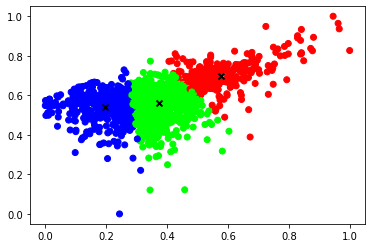

In [ ]:
df = preprocess(dftrain)
print(df)
df = df.to_numpy()
y = []
plot_parts = False
for k in range(2,11):
    y_idx = clustering(df,k,plot_parts)
    y.append(y_idx)
x = [2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(16,8))
plt.plot(x, y, 'o-')
plt.xlabel('k')
plt.ylabel('Sum Square Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

get_k = np.argmax([math.acos(y[idx+1]/y[idx])*(180/(22/7)) for idx in range(len(y)-1)])
k = get_k + 3
print("The optimal k of Elbow Method is: ",k)

plot_parts = True
clusters = clustering(df,k,plot_parts)
df = pd.DataFrame(df, columns=["scannedLineItemsPerSecond","valuePerSecond"])
final_cluster = pd.DataFrame(clusters, columns=["Clusters"])
df = pd.concat([df,final_cluster],axis=1,join="inner")



In [ ]:
df

,scannedLineItemsPerSecond,valuePerSecond,Clusters
0,0.416340,0.575610,2.0
1,0.581118,0.677669,1.0
2,0.292401,0.560441,2.0
3,0.359976,0.575166,2.0
4,0.504057,0.659016,1.0
...,...,...,...
1874,0.518090,0.673339,1.0
1875,0.508533,0.621289,1.0
1876,0.548006,0.635886,1.0
1877,0.442034,0.612116,2.0


In [ ]:
  cluster1 = df[df.Clusters == 0.0]
  cluster2 = df[df.Clusters == 1.0]
  cluster3 = df[df.Clusters == 2.0]
  for i, col in enumerate(df.columns):
    x1 = cluster1[col]
    x2 = cluster2[col]
    x3 = cluster3[col]
    fig = make_subplots(1, 2, subplot_titles=['Histogram', 'Box'])
    fig.add_trace(go.Histogram(x=x3, name='Cluster = 3'), row=1, col=1)
    fig.add_trace(go.Histogram(x=x2, name='Cluster = 2'), row=1, col=1)
    fig.add_trace(go.Histogram(x=x1, name='Cluster = 1'), row=1, col=1)
    fig.add_trace(go.Box(x=x3, name='Cluster = 3', showlegend=False), row=1, col=2)
    fig.add_trace(go.Box(x=x2, name='Cluster = 2', showlegend=False), row=1, col=2)
    fig.add_trace(go.Box(x=x1, name='Cluster = 1', showlegend=False), row=1, col=2)
    fig.update_layout(title_text=col, width=960, height=480)
    fig.show(renderer='colab')